In [2]:
!pip install roboflow 

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/looseversion-1.3.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_utilities-0.11.8-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/d

In [3]:
import roboflow
rf = roboflow.Roboflow(api_key="NqjtCN1BkDxTg2u1jXzs")

In [4]:
project=rf.workspace("ppe-dataset-jf0f5").project("ppe-kit-detection-ieadm") 


loading Roboflow workspace...
loading Roboflow project...


In [5]:
info=project.get_version_information()
# Get version information for all versions
versions = project.versions()
i=0
for version in versions:
    version_info= info[i]
    i +=1
    print(f"Version ID: {version.id}")
    print(f"Version Info: {version_info}")
    # Access individual information from version_info
    print(f"  - Number of images: {version_info['images']}")
    # ... other information as needed
    print("-" * 20)

Version ID: ppe-dataset-jf0f5/ppe-kit-detection-ieadm/3
Version Info: {'id': 'ppe-dataset-jf0f5/ppe-kit-detection-ieadm/3', 'name': '2023-12-29 4:00pm', 'created': 1703845804.441, 'images': 2359, 'splits': {'valid': 357, 'test': 191, 'train': 1811}, 'model': {'id': 'ppe-kit-detection-ieadm/3', 'endpoint': 'https://detect.roboflow.com/ppe-kit-detection-ieadm/3', 'start': 1703845897.426, 'end': 1703854683.055, 'fromScratch': False, 'tfjs': True, 'oak': True, 'map': '89.76', 'recall': '84.14', 'precision': '91.26'}, 'preprocessing': {'auto-orient': True, 'resize': {'format': 'Stretch to', 'width': 640, 'height': 640}}, 'augmentation': {}, 'exports': ['coco', 'multiclass', 'voc', 'yolov11', 'yolov5pytorch', 'yolov8', 'yolov9']}
  - Number of images: 2359
--------------------
Version ID: ppe-dataset-jf0f5/ppe-kit-detection-ieadm/2
Version Info: {'id': 'ppe-dataset-jf0f5/ppe-kit-detection-ieadm/2', 'name': '2023-12-28 2:50pm', 'created': 1703755220.641, 'images': 1144, 'splits': {'valid': 16

In [14]:
import os
HOME = os.getcwd()
print(HOME)

!mkdir -p {HOME}/datasets2
%cd {HOME}/datasets2
version =project.version(3) 
dataset =version.download("yolov11") 

/project
/project/datasets2



Extracting Dataset Version Zip to PPE-kit-detection-3 in yolov11:: 100%|██████████| 4730/4730 [00:00<00:00, 6769.69it/s]


In [15]:
project.classes

{'no-gloves': 1562,
 'gloves': 2187,
 'mask': 1478,
 'no-helmet': 1892,
 'vest': 2124,
 'helmet': 1349,
 'no-mask': 1352,
 'no-vest': 1474,
 'shoes': 3149,
 'no-shoes': 1385}

In [16]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [17]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.74 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24564MiB)
Setup complete ✅ (48 CPUs, 377.1 GB RAM, 437.9/1006.9 GB disk)


In [18]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/project
Ultralytics 8.3.74 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24564MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/project/datasets2/PPE-kit-detection-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

In [23]:
!ls {HOME}/runs/detect/train6

F1_curve.png
PR_curve.png
P_curve.png
R_curve.png
args.yaml
confusion_matrix.png
confusion_matrix_normalized.png
events.out.tfevents.1739339522.project-aiworkbench-ultralytics.1525.0
labels.jpg
labels_correlogram.jpg
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
val_batch2_labels.jpg
val_batch2_pred.jpg
weights


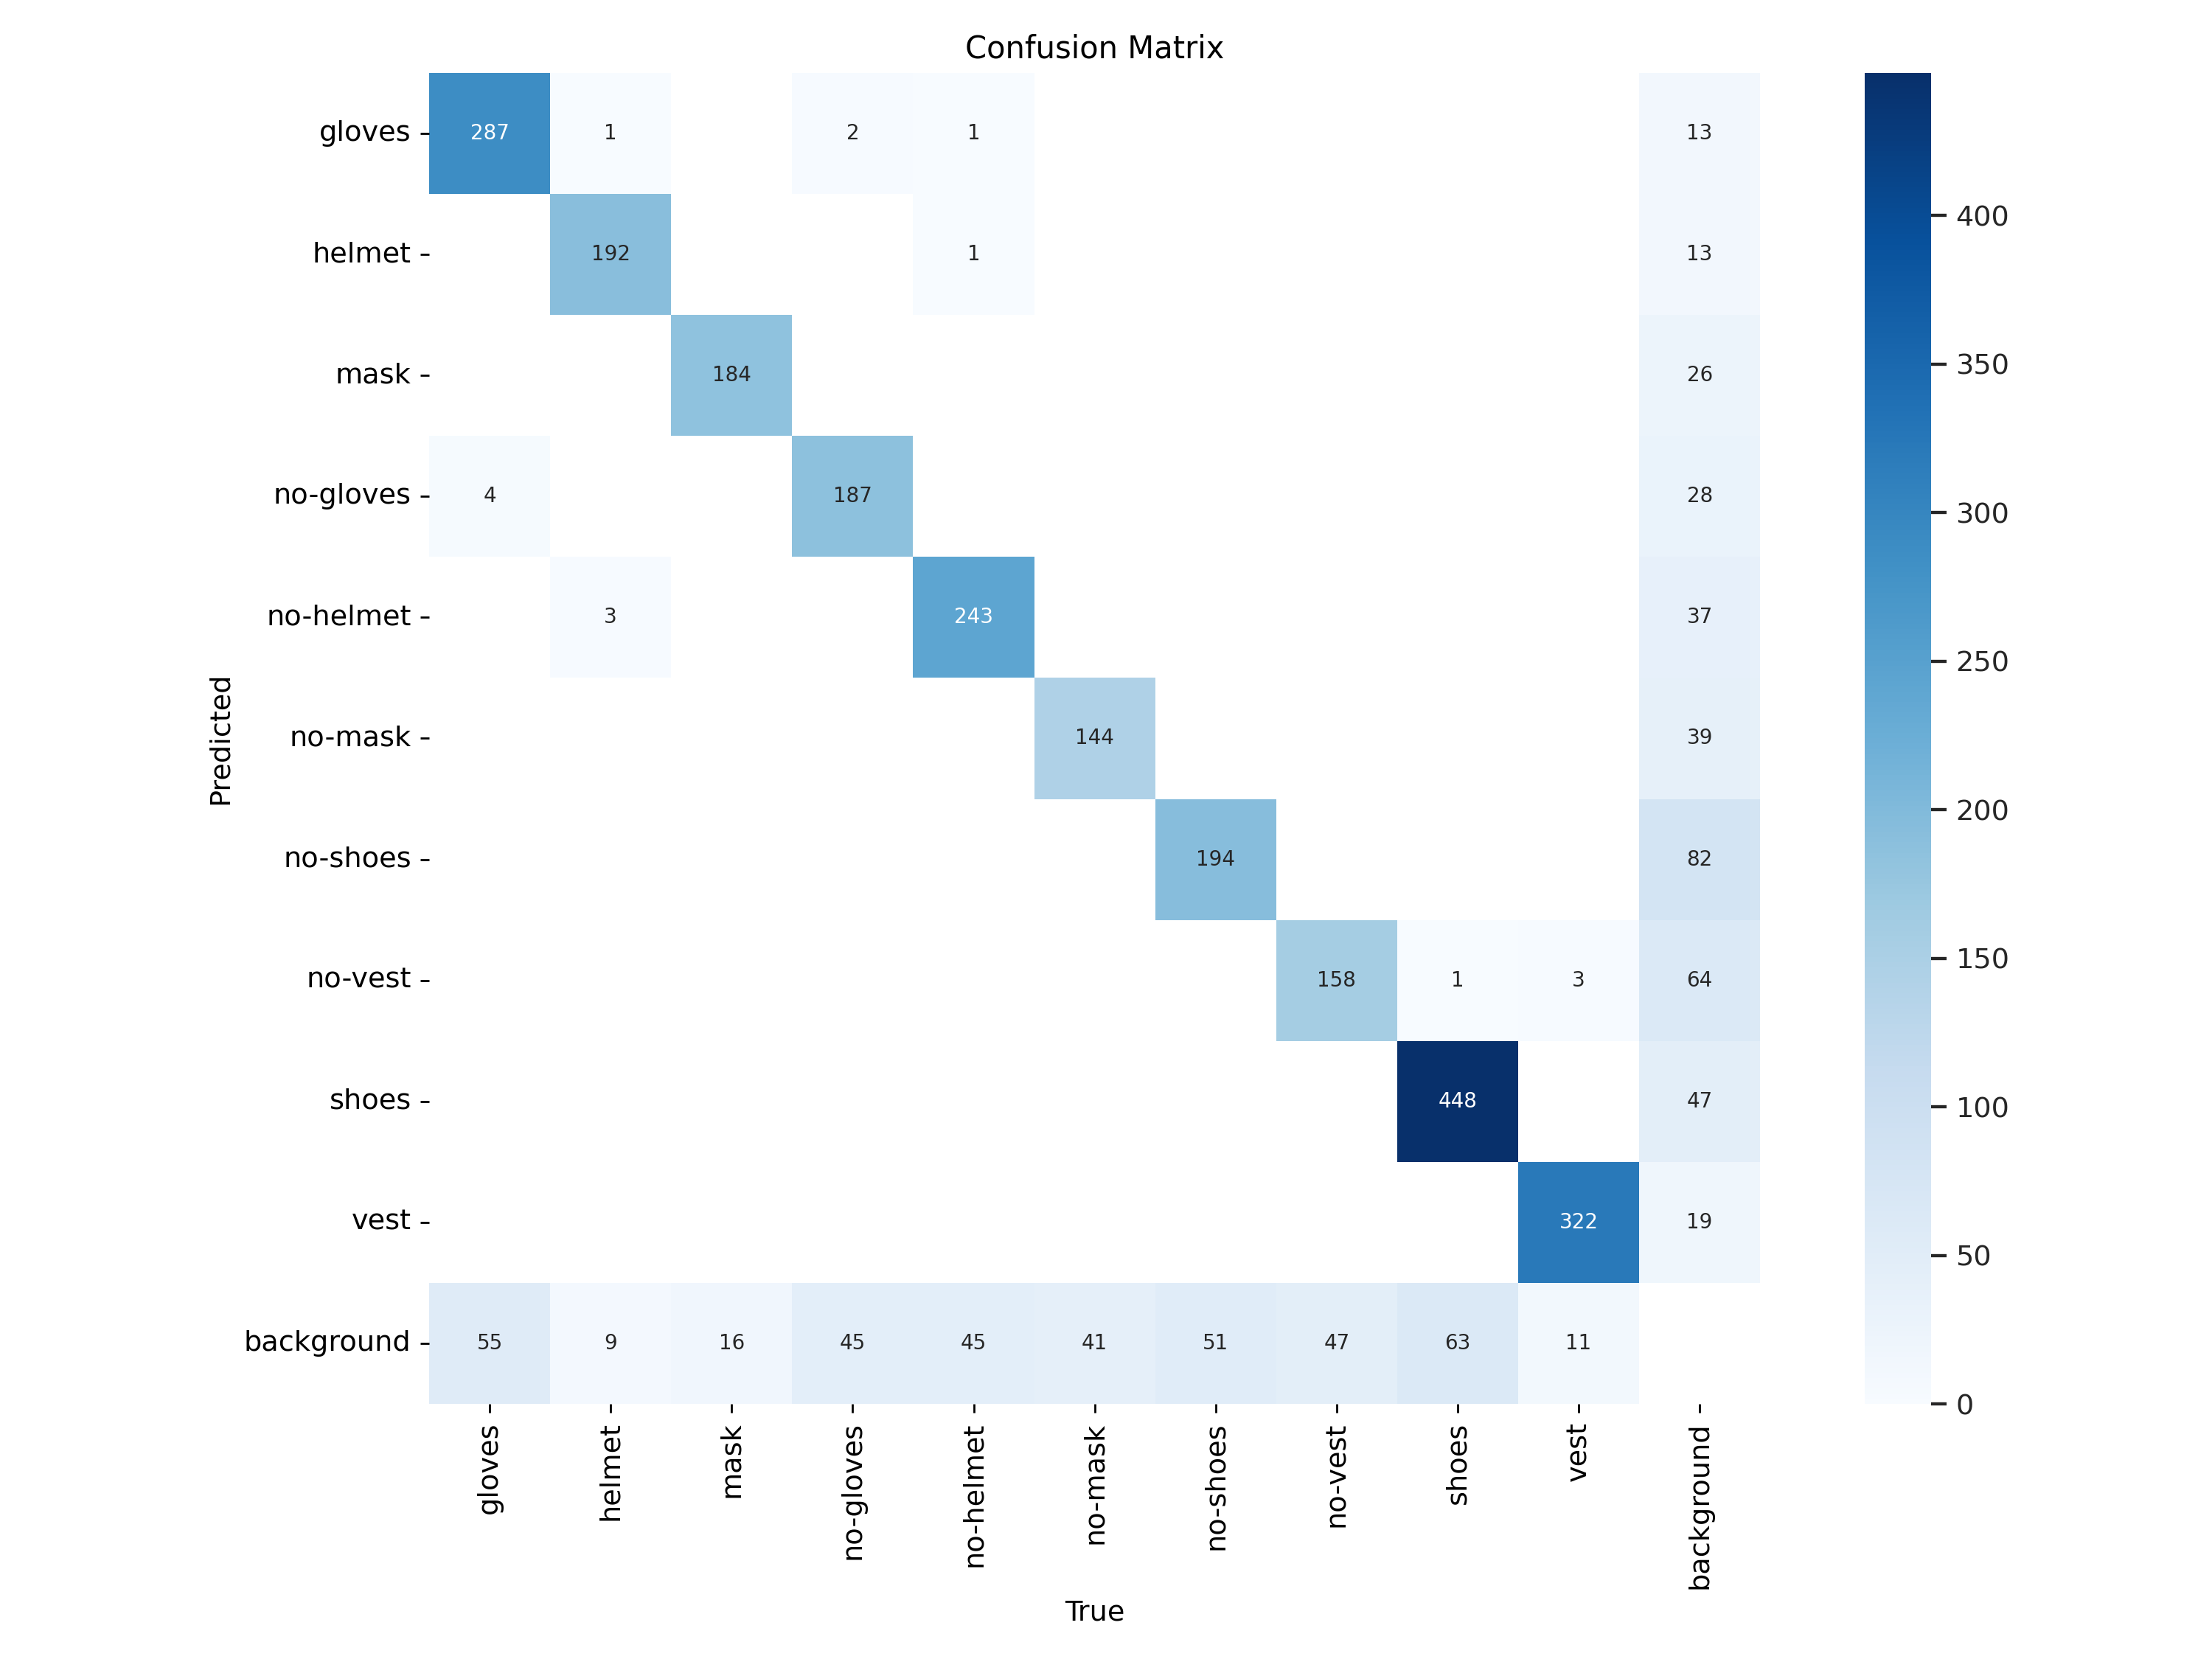

In [24]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

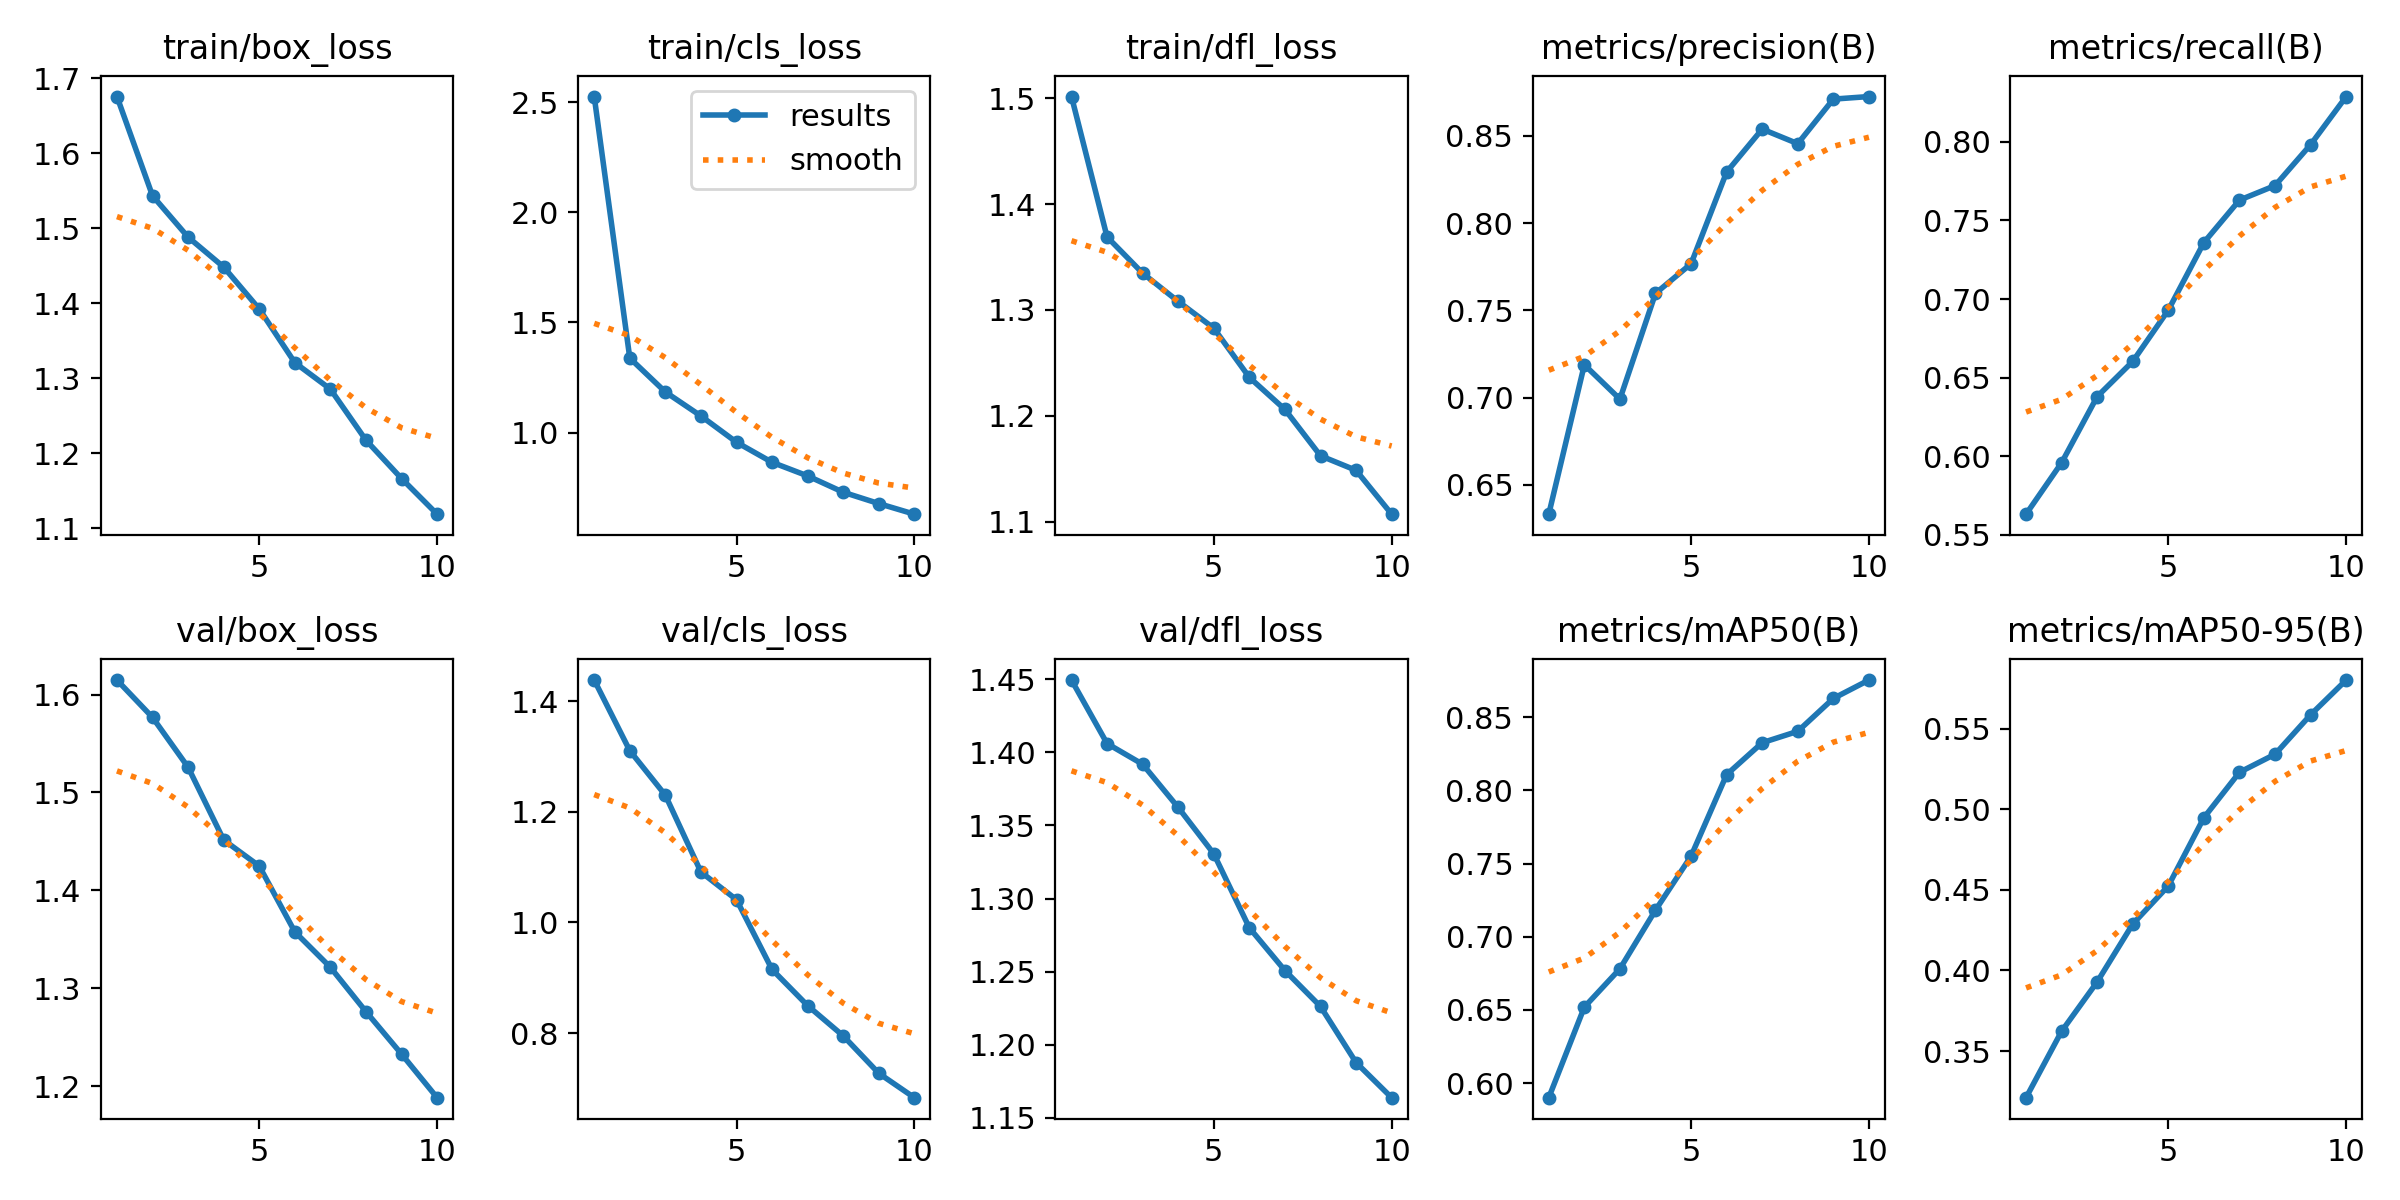

In [25]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

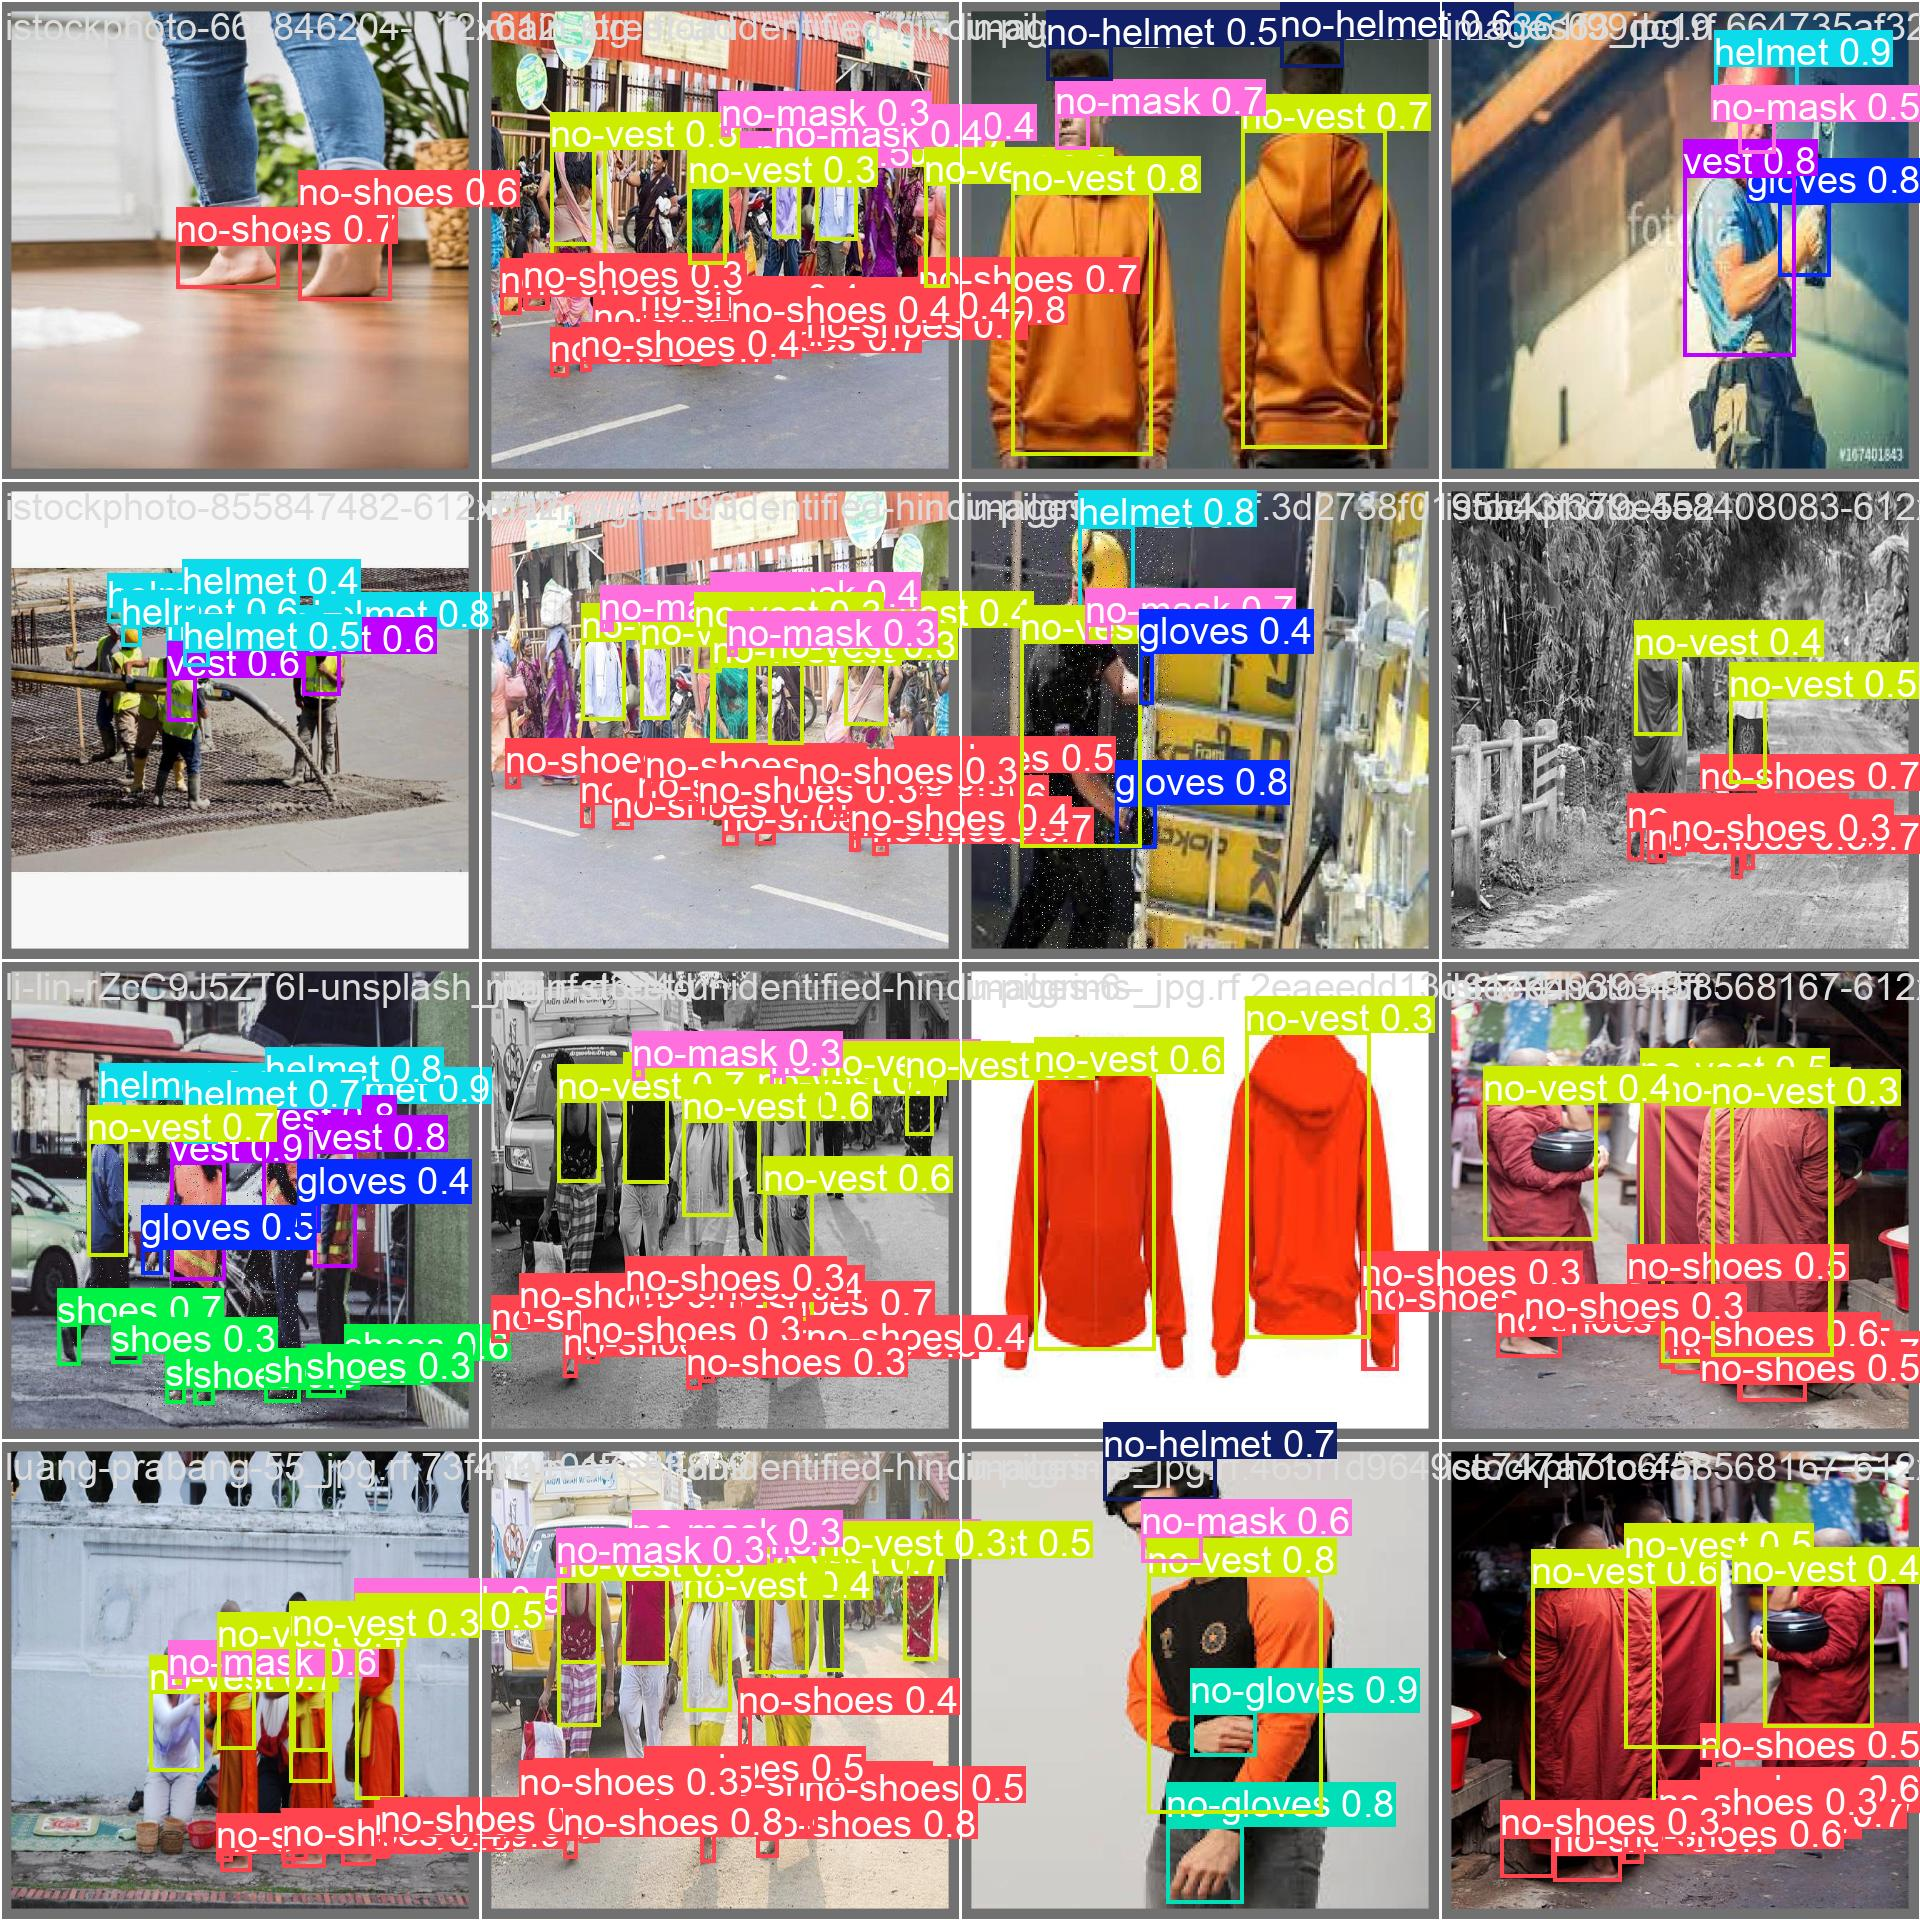

In [26]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)

In [27]:
dataset.location

'/project/datasets2/PPE-kit-detection-3'

In [28]:
!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.74 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24564MiB)
YOLO11s summary (fused): 238 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /project/datasets2/PPE-kit-detection-3/valid/labels.cache... 357 i
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 17, len(boxes) = 2758. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        357       2758      0.871      0.829      0.874       0.58
                gloves        177        346      0.953      0.835      0.876      0.622
                helmet        169        205      0.948      0.946      0.969       0.73
                  mask        153        200      0.893      0.919       0.94      0.668
             no-gloves        112    

In [29]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.74 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX A5000, 24564MiB)
YOLO11s summary (fused): 238 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs

image 1/191 /project/datasets2/PPE-kit-detection-3/test/images/00004_jpg.rf.5e2441a5c4af500454d6cd84c0867588.jpg: 640x640 2 no-glovess, 1 no-helmet, 1 no-mask, 1 vest, 16.2ms
image 2/191 /project/datasets2/PPE-kit-detection-3/test/images/00014_jpg.rf.764310f83cee0e630481666793454ba6.jpg: 640x640 1 helmet, 3 no-glovess, 1 no-helmet, 1 no-mask, 1 vest, 28.7ms
image 3/191 /project/datasets2/PPE-kit-detection-3/test/images/00027_jpg.rf.50688e375383632d43e57221d9b50799.jpg: 640x640 3 no-glovess, 2 no-helmets, 2 no-masks, 2 vests, 17.0ms
image 4/191 /project/datasets2/PPE-kit-detection-3/test/images/00041_jpg.rf.d62d8298cdbbba7405b51d66b10879e7.jpg: 640x640 1 gloves, 2 no-helmets, 2 no-masks, 2 vests, 15.2ms
image 5/191 /project/datasets2/PPE-kit-detection-3/test/images/00048_jpg.rf.44d88980a76220d10eb4820cf1f4ee0f.jpg: 

In [31]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder =glob.glob(f'{HOME}/runs/detect/predict/')
latest_folder

['/project/runs/detect/predict/']

In [37]:
for img in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
    print(img)

/project/runs/detect/predict/image_212_jpg.rf.5c37d94ee5e62560b06e6380519ef7b5.jpg
/project/runs/detect/predict/image_169_jpg.rf.613bcda70e41467ea1c7e0c8b0271142.jpg
/project/runs/detect/predict/image_204_jpg.rf.731022650b5af35cf2117947fa307e23.jpg
/project/runs/detect/predict/image_234_jpg.rf.a5f1a9b00f1d1bf4dd59dbbc159d02bf.jpg
/project/runs/detect/predict/Barefoot_jpg.rf.a86dcea7031e08b4e45714b62a09ed22.jpg
/project/runs/detect/predict/00004_jpg.rf.5e2441a5c4af500454d6cd84c0867588.jpg
/project/runs/detect/predict/image_193_jpg.rf.f06fe1fddf9c7bbfe1ef26e1f091697e.jpg
/project/runs/detect/predict/image_221_jpg.rf.015543307dd7008592149177b465eb02.jpg
/project/runs/detect/predict/image_170_jpg.rf.5557db54a95b0316fe515dffd4c1cf68.jpg
/project/runs/detect/predict/00186_jpg.rf.09150cd3b1daffc50cf60fddbf30be99.jpg
/project/runs/detect/predict/01-IMG_20210715_114405-PMN-width-1400_jpg.rf.ada3900fbed5e55ed447debba972a097.jpg
/project/runs/detect/predict/images-2022-07-04T013958_jpg.rf.37cffb8